# Read what's in data

In [1]:

import pandas

In [3]:
airlines_df = pandas.read_csv('data/airlines.csv')

airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airports_df = pandas.read_csv('data/airports.csv')

airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
planes_df = pandas.read_csv('data/planes.csv')

planes_df.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [7]:
weather_df = pandas.read_csv('data/weather.csv')

weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


# Extetend Flights dataset with timestamp

In [24]:
flights_df = pandas.read_csv('data/flights.csv')

f = flights_df
flights_df['date'] = pandas.to_datetime(flights_df[['year', 'month', 'day', 'hour', 'minute']])

flights_df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01 05:17:00
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01 05:33:00
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01 05:42:00
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01 05:44:00
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01 05:54:00


# Count covered days

In [31]:
flights_per_day_count_df = flights_df.groupby(flights_df['date'].dt.date).size()

number_of_dates = flights_per_day_count_df.shape[0] # Rows count in pandas

print('Total days covered:', number_of_groups_by_dates)

Total days covered: 365


# Count departure cities

In [48]:
flights_per_destination_count_df = flights_df.groupby(flights_df['dest']).size().sort_index().reset_index()

flights_per_destination_count_df.columns = ['dest','count']

number_of_destinations = flights_per_destination_count_df.shape[0] # Rows count in pandas

print('Total destination cities:', number_of_destinations)


Total destination cities: 105


# Plotting destination frequencies 

<BarContainer object of 105 artists>

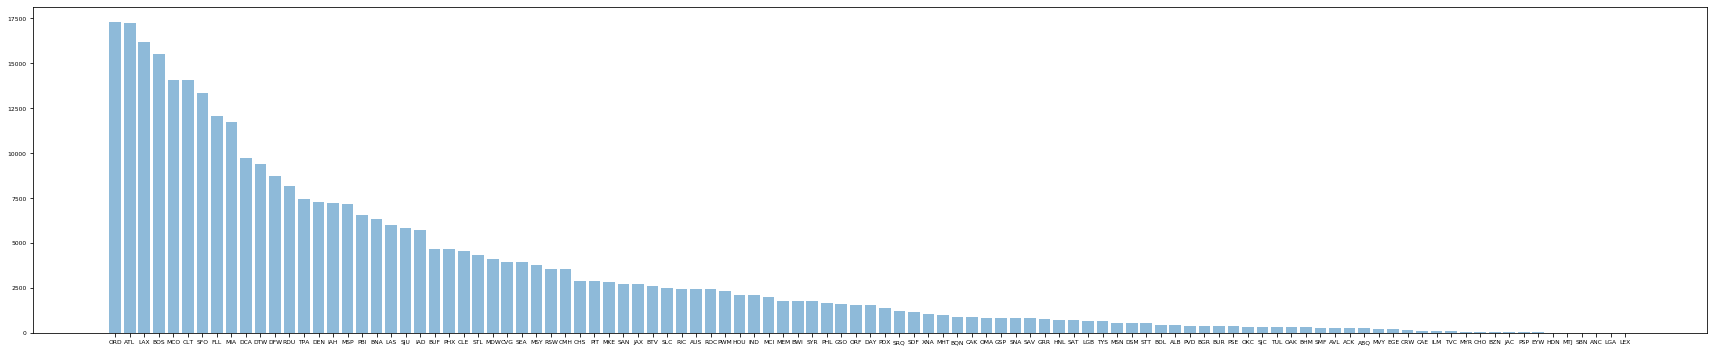

In [60]:

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(30,6))

SMALL_SIZE = 6
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)

sorted_flights_per_destination_count_df = flights_per_destination_count_df.sort_values(by=['count'], ascending=False)

plt.bar(sorted_flights_per_destination_count_df['dest'],sorted_flights_per_destination_count_df['count'], align='center', alpha=0.5)

# Exploring Flights and Planes

In [63]:
# flights_and_planes_df = flights_df.join(planes_df, on=['tailnum'], how='inner')
# flights_and_planes_df.head()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat